<a href="https://colab.research.google.com/github/adshyam/Naive-Bayes-Practice/blob/main/Naive_Bayes_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 6: Apply NB

<ol>
    <li><strong>Apply Multinomial NB on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    </li>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li></li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
        </ul>
    </li>
    <li>
fine the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using absolute values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print their corresponding feature names
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [ ]:
!wget --header="Host: doc-0k-34-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.163 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://drive.google.com/drive/folders/1Z9rSTNsSLyXeNI33KT9O42omfVl8AFWQ" --header="Cookie: AUTH_6nfn8tm4vj4u997gt948ckfg61r8pfa7_nonce=tr4u32fnlt4qi; _ga=GA1.2.1729809850.1585931326" --header="Connection: keep-alive" "https://doc-0k-34-docs.googleusercontent.com/docs/securesc/bnv5l933mv6esl8i085ddu20ff7kdp1r/i0o81ann8m26943tnajgdq5amhtaajle/1586498475000/00484516897554883881/05135824465518466232/1GU3LIJJ3zS1xLXXe-sdItSJHtI5txjVO?e=download&authuser=0&nonce=tr4u32fnlt4qi&user=05135824465518466232&hash=ehlglmis5srf37skp8du75caa8hemumr" -c -O 'preprocessed_data.csv'

--2020-04-10 06:02:26--  https://doc-0k-34-docs.googleusercontent.com/docs/securesc/bnv5l933mv6esl8i085ddu20ff7kdp1r/i0o81ann8m26943tnajgdq5amhtaajle/1586498475000/00484516897554883881/05135824465518466232/1GU3LIJJ3zS1xLXXe-sdItSJHtI5txjVO?e=download&authuser=0&nonce=tr4u32fnlt4qi&user=05135824465518466232&hash=ehlglmis5srf37skp8du75caa8hemumr
Resolving doc-0k-34-docs.googleusercontent.com (doc-0k-34-docs.googleusercontent.com)... 108.177.125.132, 2404:6800:4008:c01::84
Connecting to doc-0k-34-docs.googleusercontent.com (doc-0k-34-docs.googleusercontent.com)|108.177.125.132|:443... connected.
HTTP request sent, awaiting response... 416 Requested range not satisfiable

    The file is already fully retrieved; nothing to do.



In [ ]:
 #note most of the code is taken from the reference notebook provided 
import pandas
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer


 

In [ ]:
data = pandas.read_csv('preprocessed_data.csv',nrows=50000)
data.shape

(50000, 9)

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [ ]:
y=data['project_is_approved'].values
X=data.drop('project_is_approved',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
 
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_cv.shape)
print(y_cv.shape)



(22445, 8)
(22445,)
(11055, 8)
(11055,)


<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [ ]:
# now we have to make BOW model and TFIDF model seprately
# BOW first to essay
vectorizer_essay = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer_essay.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer_essay.transform(X_train['essay'].values)
X_cv_essay_bow = vectorizer_essay.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer_essay.transform(X_test['essay'].values)
X_train_essay_bow.shape

(22445, 5000)

In [ ]:
print("after vectorization essay is represented in nd")
print(X_train_essay_bow.shape)
print(X_cv_essay_bow.shape)
print(X_test_essay_bow.shape)
print(vectorizer_essay.get_feature_names())

after vectorization essay is represented in nd
(22445, 5000)
(11055, 5000)
(16500, 5000)
['000', '10', '100', '100 free', '100 percent', '100 students', '100 students receive', '100 students receive free', '11', '12', '12th', '13', '14', '15', '16', '17', '18', '1st', '1st grade', '20', '200', '2016', '2016 2017', '2017', '21', '21st', '21st century', '21st century learners', '21st century skills', '22', '23', '24', '25', '25 students', '26', '27', '28', '2nd', '2nd grade', '2nd graders', '30', '30 students', '3d', '3rd', '3rd grade', '3rd graders', '40', '45', '4th', '4th 5th', '4th grade', '4th graders', '50', '50 students', '500', '500 students', '5th', '5th grade', '5th grade students', '5th graders', '60', '60 minutes', '60 minutes day', '60 students', '600', '6th', '6th grade', '6th graders', '70', '70 students', '75', '7th', '7th 8th', '7th grade', '80', '80 students', '85', '8th', '8th grade', '8th grade students', '8th graders', '90', '90 students', '95', '98', '9th', 'abiliti

In [ ]:
# Actually we had to apply bow to project title ltoo, but it is not present in the preprocessed data so we move on


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [ ]:
# applying BOW on school state feature
vectorizer_state = CountVectorizer()
vectorizer_state.fit(X_train['school_state'].values)
X_train_state_bow=vectorizer_state.transform(X_train['school_state'].values)
X_cv_state_bow=vectorizer_state.transform(X_cv['school_state'].values)
X_test_state_bow=vectorizer_state.transform(X_test['school_state'].values)


In [ ]:
print("school state data after vectorization by bow")
print(X_train_state_bow.shape)
print(X_cv_state_bow.shape)
print(X_test_state_bow.shape)
print(vectorizer_state.get_feature_names())

school state data after vectorization by bow
(22445, 51)
(11055, 51)
(16500, 51)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [ ]:
# now BOW on teacher prefix
vectorizerp = CountVectorizer()
vectorizerp.fit(X_train['teacher_prefix'].values)
X_train_prefix_bow=vectorizerp.transform(X_train['teacher_prefix'].values)
X_cv_prefix_bow=vectorizerp.transform(X_cv['teacher_prefix'].values)
X_test_prefix_bow=vectorizerp.transform(X_test['teacher_prefix'].values)

In [ ]:
print("teacher_prefix data after vectorization by bow")
print(X_train_prefix_bow.shape)
print(X_cv_prefix_bow.shape)
print(X_test_prefix_bow.shape)
print(vectorizerp.get_feature_names())

teacher_prefix data after vectorization by bow
(22445, 5)
(11055, 5)
(16500, 5)
['dr', 'mr', 'mrs', 'ms', 'teacher']


In [ ]:
#now bow on price
vectorizer = CountVectorizer()
normalizer = Normalizer()
normalizer.fit(X_train['price'].values.reshape(-1,1))
X_train_price_norm_bow = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm_bow = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm_bow = normalizer.transform(X_test['price'].values.reshape(-1,1))

 


In [ ]:
print("price data after vectorization by bow")
print(X_train_price_norm_bow.shape)
print(X_cv_price_norm_bow.shape)
print(X_test_price_norm_bow.shape)
 

 

price data after vectorization by bow
(22445, 1)
(11055, 1)
(16500, 1)


In [ ]:
#bow grade 
vectorizerg = CountVectorizer()
vectorizerg.fit(X_train['project_grade_category'].values)
X_train_grade_bow=vectorizerg.transform(X_train['project_grade_category'].values)
X_cv_grade_bow=vectorizerg.transform(X_cv['project_grade_category'].values)
X_test_grade_bow=vectorizerg.transform(X_test['project_grade_category'].values)

In [ ]:
print("grade category data after vectorization by bow")
print(X_train_grade_bow.shape)
print(X_cv_grade_bow.shape)
print(X_test_grade_bow.shape)
print(vectorizerg.get_feature_names())

grade category data after vectorization by bow
(22445, 4)
(11055, 4)
(16500, 4)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


In [ ]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_bow, X_train_state_bow, X_train_prefix_bow, X_train_grade_bow, X_train_price_norm_bow)).tocsr()
X_cr = hstack((X_cv_essay_bow, X_cv_state_bow, X_cv_prefix_bow, X_cv_grade_bow, X_cv_price_norm_bow)).tocsr()
X_te = hstack((X_test_essay_bow, X_test_state_bow, X_test_prefix_bow, X_test_grade_bow, X_test_price_norm_bow)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
 

Final Data matrix
(22445, 5061) (22445,)


Now To apply Binomial Bow, we have to find the value of alpha just we found value  of k


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

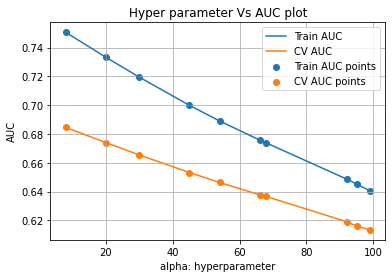

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import matplotlib.pyplot as plt
from random import randint



neigh = MultinomialNB( )
parameters = {'alpha':sp_randint(0, 100)}
 
 


clf = RandomizedSearchCV(neigh, parameters, cv=10, scoring='roc_auc',return_train_score=True)
clf.fit(X_tr, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])
 


train_auc= results['mean_train_score']
#train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
#cv_auc_std= results['std_test_score']
alpha =  results['param_alpha']

plt.plot(alpha, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

Testing the performance of the model on test data, plotting ROC Curves

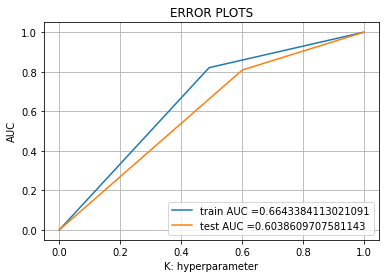

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import MultinomialNB
best_alpha=12

neigh = MultinomialNB(alpha=best_alpha)
neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = neigh.predict(X_tr)    
y_test_pred = neigh.predict(X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [ ]:
 # we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
import numpy as np

def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [ ]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.41684926490967655 for threshold 1
Train confusion matrix
[[ 1817  1761]
 [ 3380 15487]]
Test confusion matrix
[[ 1064  1604]
 [ 2643 11189]]


In [ ]:
#finding top 20 features
all_features=[]
all_features.extend(vectorizer_essay.get_feature_names())
all_features.extend(vectorizer_state.get_feature_names())
all_features.extend(vectorizerg.get_feature_names())
p=["price"]
all_features.extend(p)
all_features.extend(vectorizerp.get_feature_names())
print((all_features))
 



['000', '10', '100', '100 free', '100 percent', '100 students', '100 students receive', '100 students receive free', '11', '12', '12th', '13', '14', '15', '16', '17', '18', '1st', '1st grade', '20', '200', '2016', '2016 2017', '2017', '21', '21st', '21st century', '21st century learners', '21st century skills', '22', '23', '24', '25', '25 students', '26', '27', '28', '2nd', '2nd grade', '2nd graders', '30', '30 students', '3d', '3rd', '3rd grade', '3rd graders', '40', '45', '4th', '4th 5th', '4th grade', '4th graders', '50', '50 students', '500', '500 students', '5th', '5th grade', '5th grade students', '5th graders', '60', '60 minutes', '60 minutes day', '60 students', '600', '6th', '6th grade', '6th graders', '70', '70 students', '75', '7th', '7th 8th', '7th grade', '80', '80 students', '85', '8th', '8th grade', '8th grade students', '8th graders', '90', '90 students', '95', '98', '9th', 'abilities', 'ability', 'ability learn', 'ability levels', 'able', 'able access', 'able choose', 

In [ ]:
all_features=np.array(all_features)
print(type(all_features))

<class 'numpy.ndarray'>


In [ ]:
#reference :https://stackoverflow.com/questions/50526898/how-to-get-feature-importance-in-naive-bayes
neg_class_prob_sorted = neigh.feature_log_prob_[0, :].argsort()
top_20_neg=neg_class_prob_sorted[:20]
 
pos_class_prob_sorted = neigh.feature_log_prob_[1, :].argsort()
top_20_pos=pos_class_prob_sorted[:20]

print("following are top 20 features accourding to the each class ")
print("for positive class")
print(all_features[top_20_pos])
print("*"*50)
print("for negetive class:")
print(all_features[top_20_neg])

 

following are top 20 features accourding to the each class 
for positive class
['grades_3_5' 'wy' 'vt' 'nd' 'mt' 'ri' 'sd' 'ne' 'nh' 'hi' 'nm' 'ak' 'dc'
 'me' 'de' 'students use materials' 'these materials allow'
 'materials allow students' 'new teacher' 'senses']
**************************************************
for negetive class:
['grades_3_5' 'nd' 'wobble cushions' 'wy' 'kore' 'pedometers' 'the wobble'
 'piano' 'mt' 'card' 'balance balls' 'ri' 'sd' 'wobble stools'
 'subscription' 'chairs allow' 'vt' 'not use' 'yoga mats' 'performances']


# Now we will be same kind of operation with tfidf vectorizer instead of BOW

In [ ]:
data.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price'],
      dtype='object')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizertfidf_essay=TfidfVectorizer(max_features=5000,min_df=10,ngram_range=(1,4))
vectorizertfidf_essay.fit(X_train['essay'])
X_train_essay_tfidf=vectorizertfidf_essay.transform(X_train['essay'])
X_test_essay_tfidf=vectorizertfidf_essay.transform(X_test['essay'])
X_cv_essay_tfidf=vectorizertfidf_essay.transform(X_cv['essay'])

In [ ]:
 vectorizertfidf_state=TfidfVectorizer()
 vectorizertfidf_state.fit(X_train['school_state'])
 X_train_state_tfidf=vectorizertfidf_state.transform(X_train['school_state'])
 X_test_state_tfidf=vectorizertfidf_state.transform(X_test['school_state'])
 X_cv_state_tfidf=vectorizertfidf_state.transform(X_cv['school_state'])

In [ ]:
vectorizertfidf_prefix= TfidfVectorizer()
vectorizertfidf_prefix.fit(X_train['teacher_prefix'])
X_train_prefix_tfidf=vectorizertfidf_prefix.transform(X_train['teacher_prefix'])
X_test_prefix_tfidf=vectorizertfidf_prefix.transform(X_test['teacher_prefix'])
X_cv_prefix_tfidf=vectorizertfidf_prefix.transform(X_cv['teacher_prefix'])

In [ ]:
vectorizertfidf_grade= TfidfVectorizer()
vectorizertfidf_grade.fit(X_train['project_grade_category'])
X_train_grade_tfidf=vectorizertfidf_grade.transform(X_train['project_grade_category'])
X_test_grade_tfidf=vectorizertfidf_grade.transform(X_test['project_grade_category'])
X_cv_grade_tfidf=vectorizertfidf_grade.transform(X_cv['project_grade_category'])
 

(22445, 4)

In [ ]:
vectorizertfidf_nproject= TfidfVectorizer()
normalizer = Normalizer()
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_train_nprojects_norm_tfidf = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_nprojects_norm_tfidf = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_nprojects_norm_tfidf = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_nprojects_norm_tfidf.shape

(16500, 1)

In [ ]:
vectorizertfidf_price= TfidfVectorizer()
normalizer = Normalizer()
normalizer.fit(X_train['price'].values.reshape(-1,1))
X_train_price_norm_tfidf = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm_tfidf = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm_tfidf = normalizer.transform(X_test['price'].values.reshape(-1,1))
X_test_price_norm_tfidf.shape

(16500, 1)

In [ ]:
# for clean categories and clean sub categories 
vectorizer_categories=TfidfVectorizer()
vectorizer_categories.fit(X_train['clean_categories'])
X_train_categories_tfidf=vectorizer_categories.transform(X_train['clean_categories'])
X_test_categories_tfidf=vectorizer_categories.transform(X_test['clean_categories'])
X_cv_categories_tfidf=vectorizer_categories.transform(X_cv['clean_categories'])

vectorizer_subcategories=TfidfVectorizer()
vectorizer_subcategories.fit(X_train['clean_subcategories'])
X_train_subcategories_tfidf=vectorizer_categories.transform(X_train['clean_subcategories'])
X_test_subcategories_tfidf=vectorizer_categories.transform(X_test['clean_subcategories'])
X_cv_subcategories_tfidf=vectorizer_categories.transform(X_cv['clean_subcategories'])
 


<class 'scipy.sparse.csr.csr_matrix'>


In [ ]:
# not combining  all features 
#reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.hstack.html
from scipy.sparse import coo_matrix, hstack

X_tr=hstack((X_train_essay_tfidf,X_train_state_tfidf,X_train_prefix_tfidf,X_train_grade_tfidf,X_train_nprojects_norm_tfidf,X_train_price_norm_tfidf,X_train_categories_tfidf,X_train_subcategories_tfidf)).tocsr()

X_cv=hstack((X_cv_essay_tfidf,X_cv_state_tfidf,X_cv_prefix_tfidf,X_cv_grade_tfidf,X_cv_nprojects_norm_tfidf,X_cv_price_norm_tfidf,X_cv_categories_tfidf,X_cv_subcategories_tfidf)).tocsr()

X_te=hstack((X_test_essay_tfidf,X_test_state_tfidf,X_test_prefix_tfidf,X_test_grade_tfidf,X_test_nprojects_norm_tfidf,X_test_price_norm_tfidf,X_test_categories_tfidf,X_test_subcategories_tfidf)).tocsr()

# Now we have to Apply Hypertuning using Multinominial Naive Bayes

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.naive_bayes import MultinomialNB 
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import matplotlib.pyplot as plt
 

In [ ]:
neigh = MultinomialNB( )
parameters = {'alpha':sp_randint(0, 100)}

clf = RandomizedSearchCV(neigh, parameters, cv=20, scoring='roc_auc',return_train_score=True)
clf.fit(X_tr, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])

 

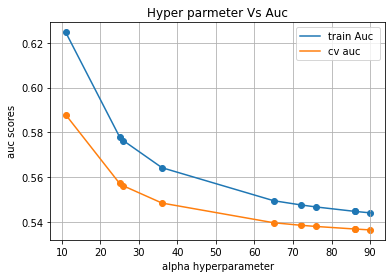

In [ ]:
alpha=results['param_alpha']
train_auc=results['mean_train_score']
cv_auc=results['mean_test_score']
plt.plot(alpha,train_auc, label='train Auc ')
plt.plot(alpha,cv_auc, label='cv auc')
plt.scatter(alpha,train_auc)
plt.scatter(alpha,cv_auc)
plt.grid()
plt.legend()
plt.title("Hyper parmeter Vs Auc")
plt.xlabel("alpha hyperparameter")
plt.ylabel("auc scores")
plt.show()

#Now we will see ROC curve

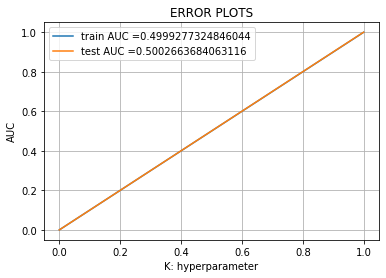

In [ ]:
best_alpha=25

from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import MultinomialNB
 

neigh = MultinomialNB(alpha=best_alpha)
neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = neigh.predict(X_tr)    
y_test_pred = neigh.predict(X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()


In [ ]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
import numpy as np

def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [ ]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.00027936723846365674 for threshold 1
Train confusion matrix
[[    1  3577]
 [    8 18859]]
Test confusion matrix
[[    2  2666]
 [    3 13829]]


In [ ]:
# finding top 20 features
all_features=[]
all_features.extend(vectorizertfidf_essay.get_feature_names())
all_features.extend(vectorizertfidf_state.get_feature_names())
all_features.extend(vectorizertfidf_grade.get_feature_names())
 
all_features.extend(vectorizer_categories.get_feature_names())
all_features.extend(vectorizer_subcategories.get_feature_names())
p=["price"]
k=["number of projects"]
all_features.extend(k)
all_features.extend(p)
all_features.extend(vectorizertfidf_prefix.get_feature_names())
print((all_features))
all_features=np.array(all_features)

['000', '10', '100', '100 free', '100 percent', '100 students', '100 students receive', '100 students receive free', '11', '12', '12th', '13', '14', '15', '16', '17', '18', '1st', '1st grade', '20', '200', '2016', '2016 2017', '2017', '21', '21st', '21st century', '21st century learners', '21st century skills', '22', '23', '24', '25', '25 students', '26', '27', '28', '2nd', '2nd grade', '2nd graders', '30', '30 students', '3d', '3rd', '3rd grade', '3rd graders', '40', '45', '4th', '4th 5th', '4th grade', '4th graders', '50', '50 students', '500', '500 students', '5th', '5th grade', '5th grade students', '5th graders', '60', '60 minutes', '60 minutes day', '60 students', '600', '6th', '6th grade', '6th graders', '70', '70 students', '75', '7th', '7th 8th', '7th grade', '80', '80 students', '85', '8th', '8th grade', '8th grade students', '8th graders', '90', '90 students', '95', '98', '9th', 'abilities', 'ability', 'ability learn', 'ability levels', 'able', 'able access', 'able choose', 

In [ ]:
#reference :https://stackoverflow.com/questions/50526898/how-to-get-feature-importance-in-naive-bayes
neg_class_prob_sorted = neigh.feature_log_prob_[0, :].argsort()
top_20_neg=neg_class_prob_sorted[:20]
 
pos_class_prob_sorted = neigh.feature_log_prob_[1, :].argsort()
top_20_pos=pos_class_prob_sorted[:20]

print("following are top 20 features accourding to the each class ")
print("for positive class")
print(all_features[top_20_pos])
print("*"*50)
print("for negetive class:")
print(all_features[top_20_neg])

following are top 20 features accourding to the each class 
for positive class
['health_wellness' 'gym_fitness' 'foreignlanguages' 'financialliteracy'
 'warmth' 'extracurricular' 'earlydevelopment' 'economics' 'esl'
 'environmentalscience' 'grades_3_5' 'wy'
 'however certainly control experience' 'control experience school day'
 'inspire even' 'control experience school'
 'lives however certainly control' 'lives however certainly'
 'home lives however certainly' 'certainly control experience school']
**************************************************
for negetive class:
['gym_fitness' 'foreignlanguages' 'financialliteracy' 'extracurricular'
 'esl' 'nd' 'economics' 'grades_3_5' 'kore' 'wobble cushions' 'the wobble'
 'pedometers' 'subscription' 'balance balls' 'card' 'chairs allow'
 'wobble stools' 'piano' 'warmth' 'earlydevelopment']


<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions

In [ ]:
data=[['BOW',"Naive Baye's",12,0.6],['TFIDF',"Naive Baye's",25,0.5]]
print("-"*55)

print(":",'vectorizer',':','Model'," "*7,':','Hyper parameter',":",'AUC'," :")
print("-"*55)
for i in data:
    print(":",i[0]," "*(9-len(i[0])),":",str(i[1])," "*(4-len(str(i[1]))), ":",str(i[2])," "*(14-len(str(i[2]))),":"," "*(6-len(str(i[1]))),str(i[3]),":")
    print("-"*55)

-------------------------------------------------------
: vectorizer : Model         : Hyper parameter : AUC  :
-------------------------------------------------------
: BOW        : Naive Baye's  : 12              :  0.6 :
-------------------------------------------------------
: TFIDF      : Naive Baye's  : 25              :  0.5 :
-------------------------------------------------------
